In [ ]:
  import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

def add_noice(x,y,noice_amplitude):
  data = np.concatenate((x,y))
  data += noice_amplitude * np.random.randn(2,data.shape[1])
  return data.T

def get_spiral(t,noice_amplitude=0.5):
  r = t
  x = r*np.cos(t)
  y = r*np.sin(t)
  return add_noice(x,y,noice_amplitude)

def perform_clustering(data,connectivity,title,num_clusters = 3,linkage = 'ward'):
  plt.figure()
  model = AgglomerativeClustering(linkage=linkage,connectivity=connectivity,n_clusters=num_clusters)
  model.fit(data)
  labels = model.labels_
  markers = '.vx'
  colors = "cmy"
  for i,marker,color in zip(range(num_clusters),markers,colors):
    plt.scatter(data[labels==i,0],data[labels==i,1],s=50,marker=marker,color=color)
  plt.title(title)


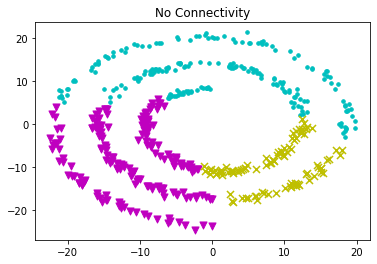

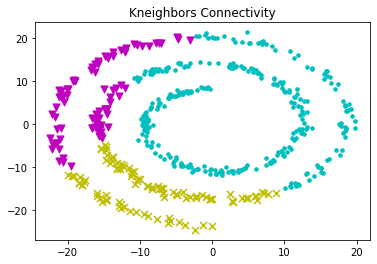

In [ ]:
n_samples = 500
np.random.seed(2)
t = 2.5*np.pi*(1+2*np.random.rand(1,n_samples))
data = get_spiral(t)

connectivity = None
perform_clustering(data,connectivity,'No Connectivity')

connectivity = kneighbors_graph(data,10,include_self=False)
perform_clustering(data,connectivity,'Kneighbors Connectivity')